In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import RocCurveDisplay
from xgboost import plot_importance
import pickle

In [3]:
# Load the data
dataset = pd.read_csv("/Users/samuelclark/Documents/UMBC Data Science /Capstone/data/final_data.csv")
#X, y = dataset[["HOUR", "WEEKDAY", "MONTH"]], dataset["CrashCount"]

X, y = dataset[[ "HOUR", "WEEKDAY", "MONTH",
       "Maximum Temperature", "Minimum Temperature", "Temperature",
       "Wind Chill", "Heat Index", "Snow", "Snow Depth", "Wind Speed",
       "Wind Gust", "Visibility"]], dataset["CrashCount"]

In [4]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
 
# Instantiation Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)

xgboost_regressor = XGBRegressor()
 
# Fitting the model
rf_regressor.fit(train_X, train_y) 

xgboost_regressor.fit(train_X, train_y) 

linear_regression = LinearRegression().fit(train_X, train_y) 

NB_regression = sm.GLM(train_y, train_X, family = sm.families.NegativeBinomial(alpha =.05)).fit()

In [5]:
# Predict the model
rf_pred = rf_regressor.predict(test_X)
xg_pred = xgboost_regressor.predict(test_X)
lin_pred = linear_regression.predict(test_X)
NB_pred = NB_regression.get_prediction(test_X)


# RMSE Computation
rf_rmse = np.sqrt(MSE(test_y, rf_pred))
xg_rmse = np.sqrt(MSE(test_y, xg_pred))
lin_rmse = np.sqrt(MSE(test_y, lin_pred))


print("Random Forest RMSE : % f" %(rf_rmse))
print("XGBoost RMSE : % f" %(xg_rmse))
print("Linear Regression RMSE : % f" %(lin_rmse))

#min and max
rf_minimum = min(rf_pred)
rf_maximum = max(rf_pred)
xg_minimum = min(xg_pred)
xg_maximum = max(xg_pred)
lin_minimum = min(lin_pred)
lin_maximum = max(lin_pred)
print('rf minimum vlaue:',rf_minimum)
print('rf maximum vlaue:',rf_maximum)
print('xg minimum vlaue:',xg_minimum)
print('xg maximum vlaue:',xg_maximum)
print('lin minimum vlaue:',lin_minimum)
print('lin maximum vlaue:',lin_maximum)

# Use the forest's predict method on the test data
rf_errors = abs(rf_pred - test_y)# Print out the mean absolute error (mae)
xg_errors = abs(xg_pred - test_y)# Print out the mean absolute error (mae)
lin_errors = abs(lin_pred - test_y)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(xg_errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(lin_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
rf_mape = 100 * (rf_errors / test_y)# Calculate and display accuracy
rf_accuracy = 100 - np.mean(rf_mape)
xg_mape = 100 * (xg_errors / test_y)# Calculate and display accuracy
xg_accuracy = 100 - np.mean(xg_mape)
lin_mape = 100 * (lin_errors / test_y)# Calculate and display accuracy
lin_accuracy = 100 - np.mean(lin_mape)
print('Random Forest Accuracy:', round(rf_accuracy, 2), '%.')
print('XGBoost Accuracy:', round(xg_accuracy, 2), '%.')
print('Linear Regression Accuracy:', round(lin_accuracy, 2), '%.')


Random Forest RMSE :  9.555508
XGBoost RMSE :  9.725495
Linear Regression RMSE :  26.501797
rf minimum vlaue: 13.538
rf maximum vlaue: 120.155
xg minimum vlaue: 10.224862
xg maximum vlaue: 118.928635
lin minimum vlaue: 40.28975340604597
lin maximum vlaue: 77.37886943070555
Mean Absolute Error: 7.52 degrees.
Mean Absolute Error: 7.67 degrees.
Mean Absolute Error: 22.07 degrees.
Random Forest Accuracy: 82.12 %.
XGBoost Accuracy: 81.22 %.
Linear Regression Accuracy: 29.6 %.


<Figure size 432x288 with 0 Axes>

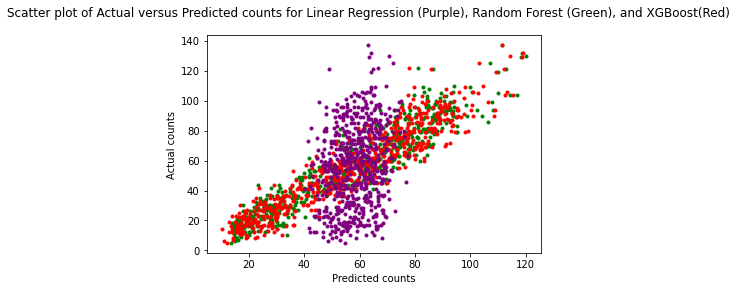

<Figure size 432x288 with 0 Axes>

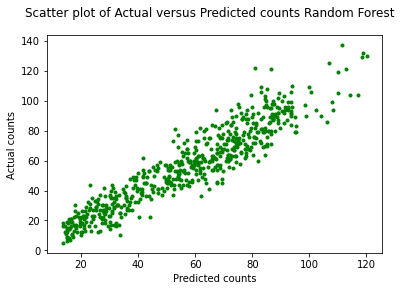

<Figure size 432x288 with 0 Axes>

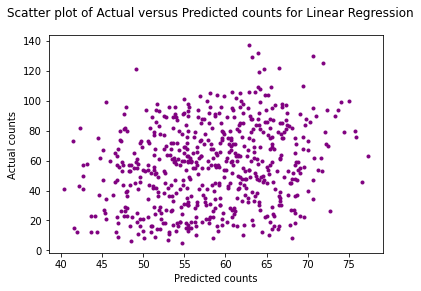

<Figure size 432x288 with 0 Axes>

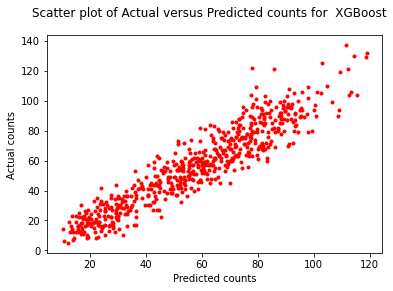

In [6]:
#Random Forest
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts for Linear Regression (Purple), Random Forest (Green), and XGBoost(Red)')
plt.scatter(x=rf_pred, y=test_y, marker='.', color=['green'])
plt.scatter(x=xg_pred, y=test_y, marker='.', color=['Red'])
plt.scatter(x=lin_pred, y=test_y, marker='.', color=['Purple'])
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts Random Forest')
plt.scatter(x=rf_pred, y=test_y, marker='.', color=['green'])
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts for Linear Regression')
plt.scatter(x=lin_pred, y=test_y, marker='.', color=['Purple'])
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

#Random Forest
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts for  XGBoost')
plt.scatter(x=xg_pred, y=test_y, marker='.', color=['Red'])
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [6]:

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

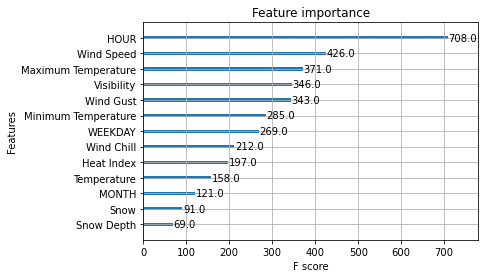

In [34]:
plot_importance(xgboost_regressor)
plt.show()

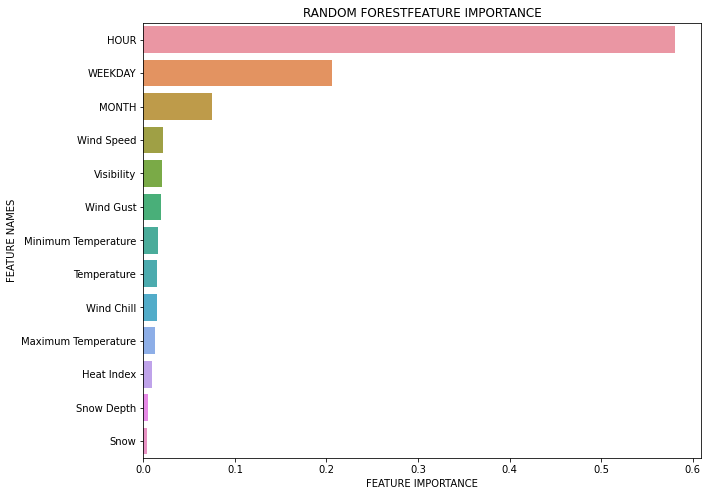

In [7]:
plot_feature_importance(regressor.feature_importances_, X.columns, 'RANDOM FOREST')

In [8]:
# Export the ML model
with open(r'/Users/samuelclark/Documents/UMBC Data Science /Capstone/model/rfr_model.pickle', 'wb') as f:
    pickle.dump(regressor, f)